In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler

DATA_FOLDER = 'dataset'
DATASET = os.path.join(DATA_FOLDER, 'outliers_labelled.csv')

df = pd.read_csv(DATASET)
numerical_attr_list = [col for col in df.columns if is_numeric_dtype(df[col])]

normalized_df = MinMaxScaler().fit_transform(df[numerical_attr_list].values)

In [32]:
df["is_outlier_vc_abod"]

0       False
1       False
2       False
3       False
4       False
        ...  
2447    False
2448    False
2449    False
2450    False
2451    False
Name: is_outlier_vc_abod, Length: 2452, dtype: bool

In [55]:
def plot_outliers_in_embedding(embedding):
    fig, axes = plt.subplots(2,2, sharex=True, sharey=True)

    for ax in axes.flatten():
        ax.axis("off")

    axabod, axlof, axisfo, _ = axes.flatten()
    methods = [s.format(cat="sex") for s in ["is_outlier_{cat}_abod",
                                            "is_outlier_{cat}_lof", 
                                            "is_outlier_{cat}_isfo"]
                ]
    for ax, method in zip([axabod, axlof, axisfo], methods):
        ax.scatter(*embedding.T, c=pd.Categorical(df["sex"]).codes, cmap="viridis", s=10)
        ax.scatter(*(embedding[df[method].values]).T, marker="x", color="green", s=8)
        ax.set_title(method)
    return fig, axes

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: title={'center': 'is_outlier_sex_abod'}>,
         <Axes: title={'center': 'is_outlier_sex_lof'}>],
        [<Axes: title={'center': 'is_outlier_sex_isfo'}>, <Axes: >]],
       dtype=object))

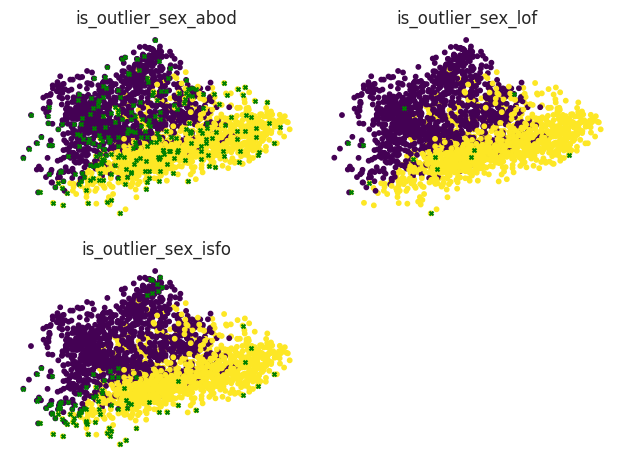

In [56]:
from sklearn.decomposition import PCA
res = PCA(n_components=2)
embedding = res.fit_transform(normalized_df)
plot_outliers_in_embedding(embedding)

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: title={'center': 'is_outlier_sex_abod'}>,
         <Axes: title={'center': 'is_outlier_sex_lof'}>],
        [<Axes: title={'center': 'is_outlier_sex_isfo'}>, <Axes: >]],
       dtype=object))

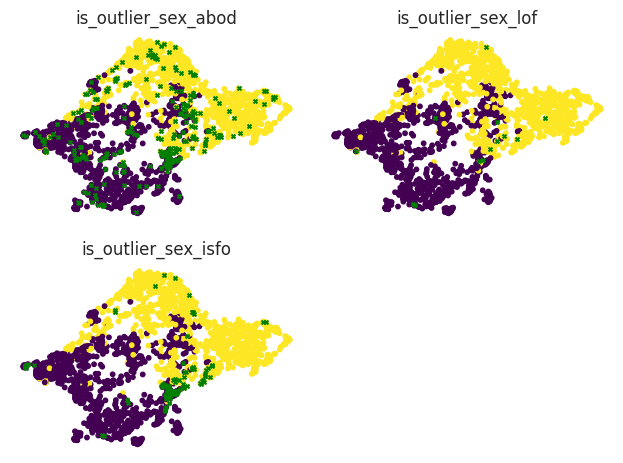

In [57]:
import umap
reducer = umap.UMAP(n_components=2, n_neighbors=50)
embedding = reducer.fit_transform(normalized_df)
plot_outliers_in_embedding(embedding)

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: title={'center': 'is_outlier_sex_abod'}>,
         <Axes: title={'center': 'is_outlier_sex_lof'}>],
        [<Axes: title={'center': 'is_outlier_sex_isfo'}>, <Axes: >]],
       dtype=object))

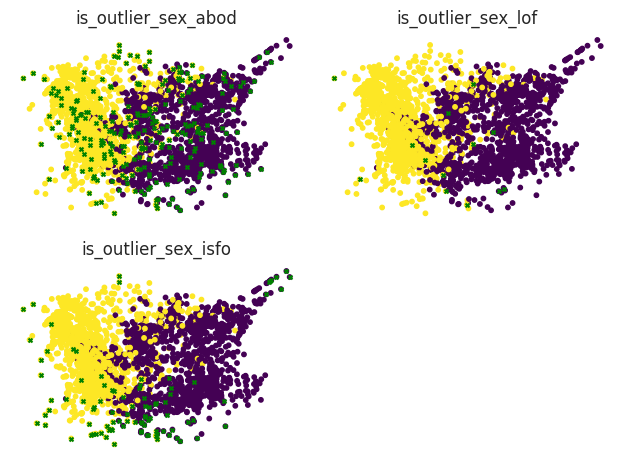

In [58]:
from sklearn.manifold import Isomap
reducer = Isomap(n_components=2, n_neighbors=6)
embedding = reducer.fit_transform(normalized_df)
plot_outliers_in_embedding(embedding)